In [1]:
"""
Davey Proctor
A255 Pset9 Final Project Part II: In search of stellar mass black holes
Data reduction of one raw optical spectra data

Astro:
Spectroscopy IIb
Deriving wave equation to map pixels -> wavelength
Flat correcting spectral data

Python:
Fitting Gaussians to emission lines
Deriving Centers of n peaks of a profile
Fitting a polynomial to 1D data using np.polyfit and np.poly1d (search for best_fit_fn)
np.histogram
"""

'\nDavey Proctor\nA255 Pset9 Final Project\nSpectroscopy IIb\nIn search of black holes: Data reduction of one raw spectra data\n'

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
from astropy.io import ascii
import glob
from scipy.optimize import curve_fit
from astropy.io import fits

In [3]:
pwd = '/Users/dproctor15/Google Drive/Yale 2/yr2_fall/astr255/9-final/'
data_dir = 'spectra_data/'
comp_file = glob.glob(pwd + data_dir + 'n1_comp.fits')[0]
sci_files = glob.glob(pwd + data_dir + 'n1_sci*.fits')
print comp_file
print sci_files

/Users/dproctor15/Google Drive/Yale 2/yr2_fall/astr255/9-final/spectra_data/n1_comp.fits
['/Users/dproctor15/Google Drive/Yale 2/yr2_fall/astr255/9-final/spectra_data/n1_sci1.fits', '/Users/dproctor15/Google Drive/Yale 2/yr2_fall/astr255/9-final/spectra_data/n1_sci2.fits', '/Users/dproctor15/Google Drive/Yale 2/yr2_fall/astr255/9-final/spectra_data/n1_sci3.fits']


In [4]:
def read_image(filename):
    fits_file = fits.open(filename)
    image = fits_file[0]
    return image

In [5]:
comp = read_image(comp_file)
sci1 = read_image(sci_files[0])

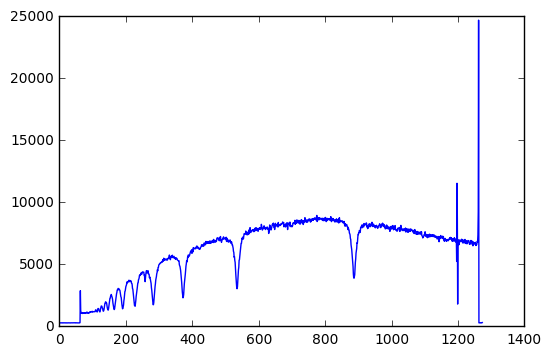

In [6]:
plt.plot(sci1.data[100,:])

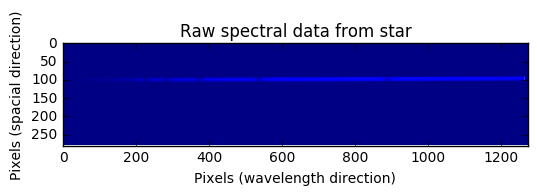

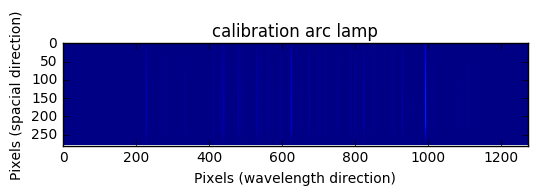

In [7]:
plt.title('Raw spectral data from star')
plt.xlabel('Pixels (wavelength direction)')
plt.ylabel('Pixels (spacial direction)')
im = plt.imshow(sci1.data)
plt.show()

plt.title('calibration arc lamp')
plt.xlabel('Pixels (wavelength direction)')
plt.ylabel('Pixels (spacial direction)')
im = plt.imshow(comp.data) #, cmap=plt.cm.Greys_r)
plt.show()
# plt.plot(comp)

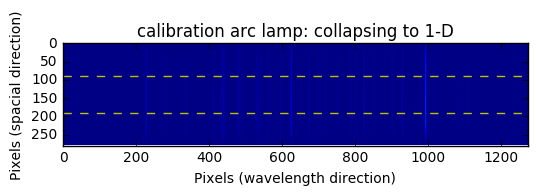

In [8]:
cent0 = len(comp.data) / 2
delt0 = 50
im = plt.imshow(comp.data)
plt.axhline(y=cent0-delt0, linewidth=1, c='y', ls='dashed')
plt.axhline(y=cent0+delt0, linewidth=1, c='y', ls='dashed')
plt.title('calibration arc lamp: collapsing to 1-D')
plt.xlabel('Pixels (wavelength direction)')
plt.ylabel('Pixels (spacial direction)')

In [9]:
comp.data.shape

(280, 1274)

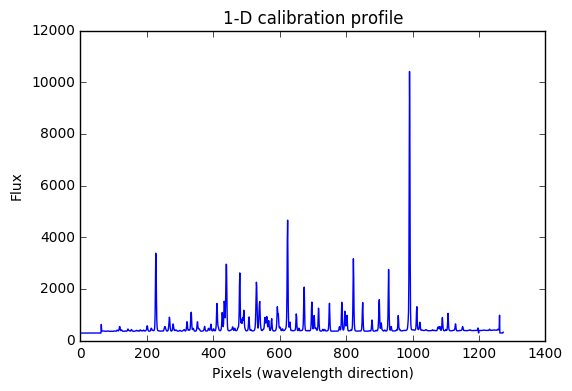

In [10]:
plt.plot(np.median(comp.data, axis=0))
plt.title('1-D calibration profile')
plt.xlabel('Pixels (wavelength direction)')
plt.ylabel('Flux')
plt.show()

In [11]:
comp1d = np.median(comp.data, axis=0) #one_d_flatten(comp.data) #comp.data[100,:]

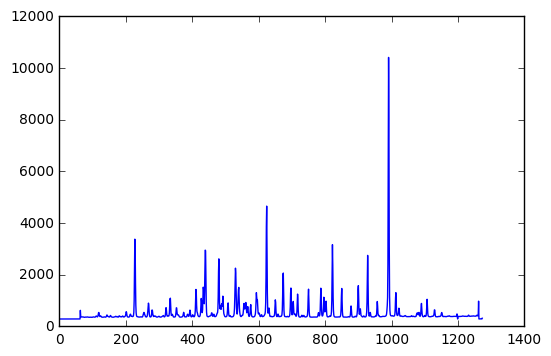

In [12]:
plt.plot(comp1d)

In [13]:
arr2 = comp1d.tolist()
for pix_val in sorted(arr2)[::-1][:10]:
    print pix_val, arr2.index(pix_val)

10414.0 991
8052.0 992
6126.5 990
4657.5 624
3866.0 623
3378.5 227
3206.5 993
3166.0 822
3104.0 228
2953.5 439


In [14]:
def n_big_lines(n,comp):
    arr2 = comp.tolist()
    arr3 = sorted(arr2)[::-1][:4*n]
    idxs = [arr2.index(x) for x in arr3]
#     print idxs
    arr4 = []
    for i, idx in enumerate(idxs):
#         if i > 0 and (idx == idxs[i-1] - 1 or idx == idxs[i-1] + 1):
        if idx - 1 in arr4 or idx + 1 in arr4 or idx - 2 in arr4 or idx + 2 in arr4:
            pass
        else:
            arr4.append(idx)
    return arr4[:n]
    
#     for pix_val in sorted(arr2)[::-1][:10]:
#         print pix_val, arr2.index(pix_val)

In [15]:
n = 10
lines10 = n_big_lines(n,comp1d)

In [16]:
print lines10

[991, 624, 227, 822, 439, 928, 480, 530, 674, 900]


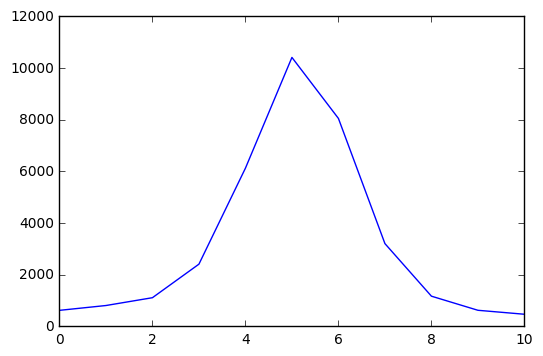

In [17]:
delt = 5
em_wind = arr2[991-delt:992+delt]
plt.plot(em_wind)

Fitted mean =  5.16577179142
Fitted standard deviation =  -1.25812356767


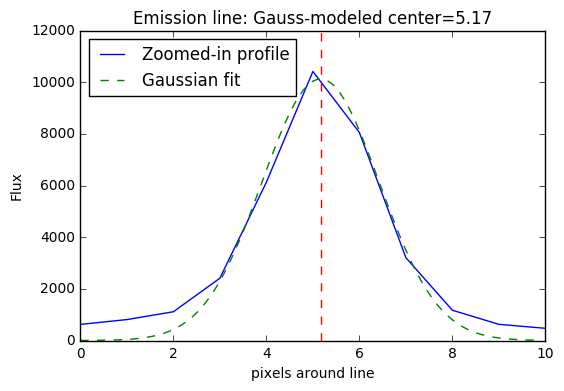

In [18]:
# Define model function to be used to fit to the data above:
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
p0 = [1., 0., 1.]

hist = em_wind
bin_centres = np.arange(len(em_wind)) #np.arange(.5,10.5,1) #[x+.5 for x in xrange(10)]

coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)

# Get the fitted curve
# hist_fit = gauss(bin_centres, *coeff)
xs = np.arange(0,10,.1)
hist_fit = gauss(xs, *coeff)

plot0, = plt.plot(bin_centres, hist, label='Test data')
plot1, = plt.plot(xs, hist_fit, label='Fitted data', ls='dashed')
plt.axvline(x=coeff[1],c='r',ls='dashed')
# plt.plot(bin_centres, hist_fit, label='Fitted data')

plt.legend([plot0,plot1],['Zoomed-in profile', 'Gaussian fit'],loc=2)
plt.title('Emission line: Gauss-modeled center=%.2f'%coeff[1])
plt.xlabel('pixels around line')
plt.ylabel('Flux')

# Finally, lets get the fitting parameters, i.e. the mean and standard deviation:
print 'Fitted mean = ', coeff[1]
print 'Fitted standard deviation = ', coeff[2]

plt.show()

In [19]:
range(1,5,1)

[1, 2, 3, 4]

In [20]:
def line_window(line, comp, delt=5):
    return comp[line-delt:line+delt+1]

In [21]:
def line_center(line, comp):    
    p0 = [1., 0., 1.]
    delt = 5
    line_wind = line_window(line, comp, delt)
    bin_centres = np.arange(len(line_wind)) #np.arange(.5,10.5,1) #[x+.5 for x in xrange(10)]
    coeff, mat = curve_fit(gauss, bin_centres, line_wind, p0=p0)
    return line - delt + coeff[1], coeff[2]


In [22]:
def x():
    return 0,1
y,z = x()
print y

0


In [23]:
line_center(lines10[0], comp1d)[0]

991.1657717914203

In [24]:
def all_line_centers(lines, comp):
    arr = []
    for line1 in lines:
        arr.append(line_center(line1,comp)[0])
    return arr

In [25]:
print lines10
prec_lines10 = all_line_centers(lines10, comp1d)
print prec_lines10
prec_lines10 = sorted(prec_lines10)
print prec_lines10

[991, 624, 227, 822, 439, 928, 480, 530, 674, 900]
[991.1657717914203, 623.75658154949815, 227.35970508989419, 822.09028232214121, 439.10646106163563, 927.99307241410168, 479.94212680260267, 530.17943090116353, 673.52240514805362, 899.73527464619019]
[227.35970508989419, 439.10646106163563, 479.94212680260267, 530.17943090116353, 623.75658154949815, 673.52240514805362, 822.09028232214121, 899.73527464619019, 927.99307241410168, 991.1657717914203]


In [26]:
def id_help(line,comp):
    plt.plot(comp)
    plt.axvline(x=line, linewidth=1, c='c', ls='dashed')
#     plt.show()

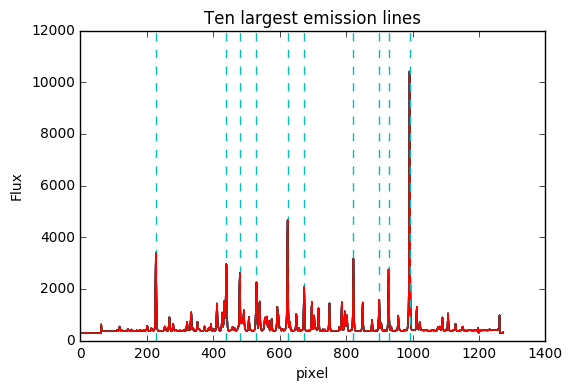

In [27]:
for line1 in prec_lines10:
    id_help(line1,comp1d)
plt.title('Ten largest emission lines')
plt.xlabel('pixel')
plt.ylabel('Flux')
plt.show()

In [28]:
"""
3888.646    HeI
4200.674    ArI *
4259.361    AI(9)
4333.561    ArI *
4471.477    HeI
4545.08     AII(15)
4764.89     AII(15)
4879.90     AII(14)
4921.929    HeI
5015.675    HeI
"""
prec_wvlens = [3888.646, 4200.674, 4259.361, 4333.561, 4471.477,
               4545.08, 4764.89, 4879.90, 4921.929, 5015.675]
print len(prec_wvlens)

10


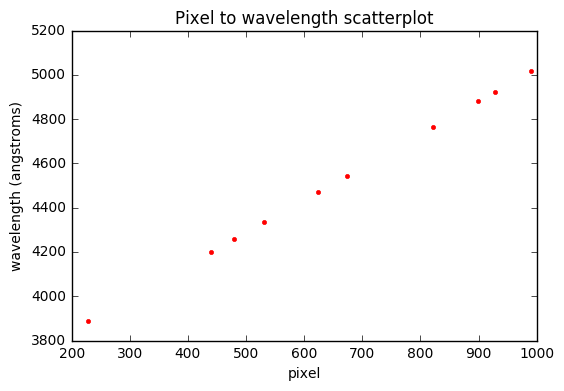

In [29]:
plt.plot(prec_lines10,prec_wvlens,'r.')
plt.title('Pixel to wavelength scatterplot')
plt.xlabel('pixel')
plt.ylabel('wavelength (angstroms)')

In [30]:
coefs2 = np.polyfit(prec_lines10,prec_wvlens,3)
print coefs2

[  1.13604827e-08  -7.09169285e-06   1.46994072e+00   3.55476993e+03]


In [31]:
gfit = np.poly1d(coefs2)
print gfit

           3             2
1.136e-08 x - 7.092e-06 x + 1.47 x + 3555


In [32]:
def best_fit_fn(lines,wvlens,order):
    return np.poly1d(np.polyfit(lines,wvlens,order))
print best_fit_fn(prec_lines10,prec_wvlens,3)

           3             2
1.136e-08 x - 7.092e-06 x + 1.47 x + 3555


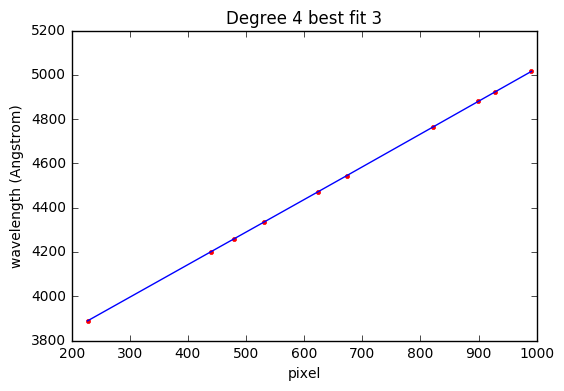

In [33]:
gfit = best_fit_fn(prec_lines10,prec_wvlens,4)
plt.plot(prec_lines10,prec_wvlens,'r.')
plt.plot(prec_lines10,gfit(prec_lines10))
plt.title('Degree 4 best fit 3')
plt.xlabel('pixel')
plt.ylabel('wavelength (Angstrom)')

[200, 1100, -1, 1]

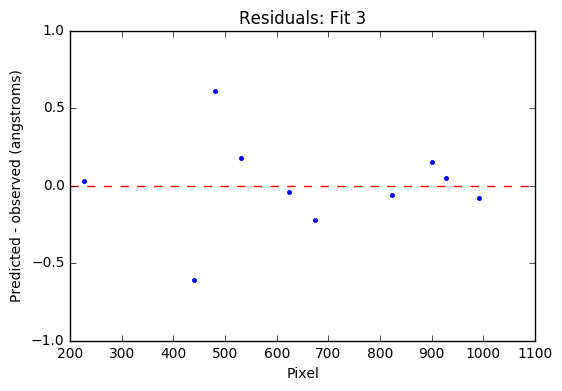

In [34]:
plt.plot(prec_lines10,gfit(prec_lines10) - prec_wvlens, 'b.')
plt.axhline(y=0,ls='dashed',c='r')
plt.title('Residuals: Fit 3')
plt.ylabel('Predicted - observed (angstroms)')
plt.xlabel('Pixel')
# plt.plot([prec_lines10[1]],[prec_wvlens[1]], 'r.')
plt.axis([200,1100,-1,1])

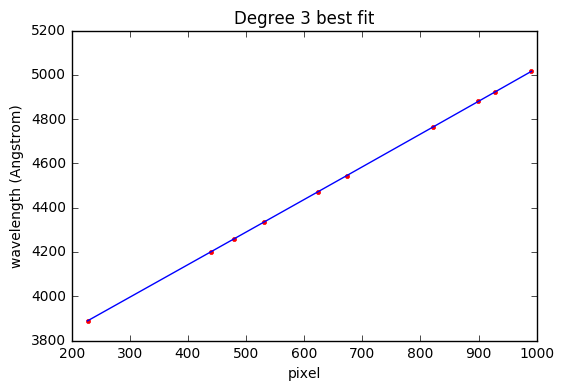

In [35]:
gfit = best_fit_fn(prec_lines10,prec_wvlens,3)
plt.plot(prec_lines10,prec_wvlens,'r.')
plt.plot(prec_lines10,gfit(prec_lines10))
plt.title('Degree 3 best fit')
plt.xlabel('pixel')
plt.ylabel('wavelength (Angstrom)')

[200, 1100, -1, 1]

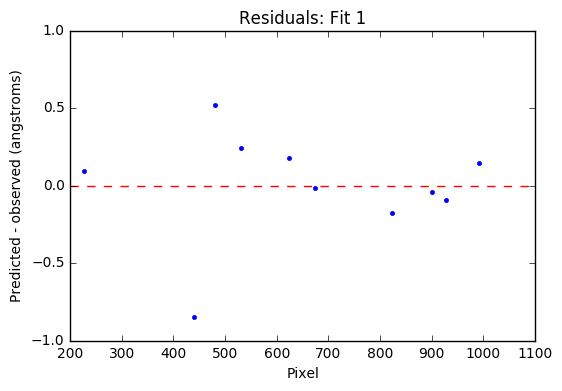

In [36]:
plt.plot(prec_lines10,gfit(prec_lines10) - prec_wvlens, 'b.')
plt.axhline(y=0,ls='dashed',c='r')
plt.title('Residuals: Fit 1')
plt.ylabel('Predicted - observed (angstroms)')
plt.xlabel('Pixel')
# plt.plot([prec_lines10[1]],[prec_wvlens[1]], 'r.')
plt.axis([200,1100,-1,1])

In [37]:
print prec_wvlens
print prec_lines10

[3888.646, 4200.674, 4259.361, 4333.561, 4471.477, 4545.08, 4764.89, 4879.9, 4921.929, 5015.675]
[227.35970508989419, 439.10646106163563, 479.94212680260267, 530.17943090116353, 623.75658154949815, 673.52240514805362, 822.09028232214121, 899.73527464619019, 927.99307241410168, 991.1657717914203]


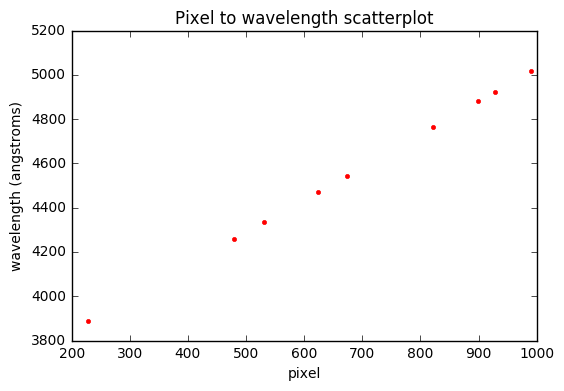

In [38]:
prec_lines9 = np.array([227.35970508989419, 479.94212680260267, 530.17943090116353, 623.75658154949815, 673.52240514805362, 822.09028232214121, 899.73527464619019, 927.99307241410168, 991.1657717914203])
prec_wvlens9 = np.array([3888.646, 4259.361, 4333.561, 4471.477, 4545.08, 4764.89, 4879.9, 4921.929, 5015.675])
plt.plot(prec_lines9,prec_wvlens9,'r.')
plt.title('Pixel to wavelength scatterplot')
plt.xlabel('pixel')
plt.ylabel('wavelength (angstroms)')

In [39]:
print prec_lines9.shape, prec_wvlens9.shape

(9,) (9,)


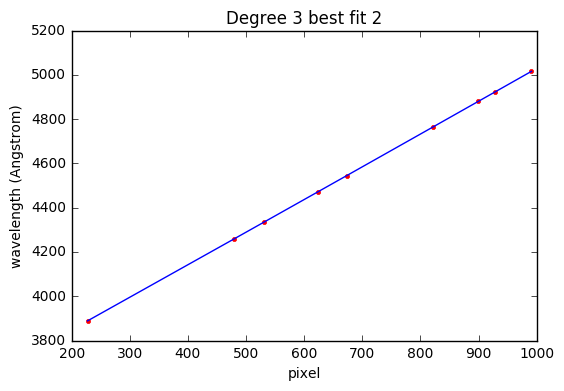

In [40]:
gfit = best_fit_fn(prec_lines9,prec_wvlens9,3)
plt.plot(prec_lines9,prec_wvlens9,'r.')
plt.plot(prec_lines9,gfit(prec_lines9))

plt.title('Degree 3 best fit 2')
plt.xlabel('pixel')
plt.ylabel('wavelength (Angstrom)')

[200, 1100, -1, 1]

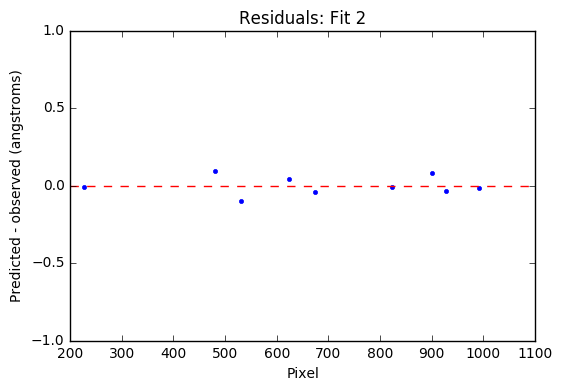

In [41]:
plt.plot(prec_lines9,gfit(prec_lines9) - prec_wvlens9, 'b.')
plt.axhline(y=0,ls='dashed',c='r')
plt.title('Residuals: Fit 2')
plt.ylabel('Predicted - observed (angstroms)')
plt.xlabel('Pixel')
plt.axis([200,1100,-1,1])

In [42]:
diffs = np.array([abs(gfit(prec_lines10[i]) - prec_wvlens[i]) for i in xrange(len(prec_lines10))])
print diffs
print np.max(diffs)

[ 0.00703226  1.31956012  0.09260909  0.09952733  0.03900433  0.04502953
  0.00665571  0.07812939  0.03383174  0.01766624]
1.31956012246


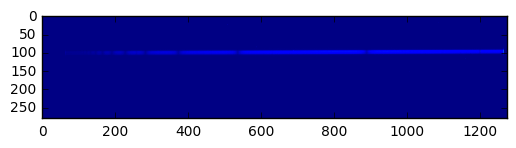

In [43]:
im = plt.imshow(sci1.data) #, cmap=plt.cm.Greys_r)

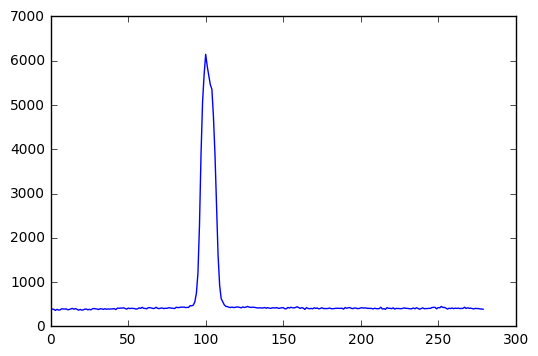

In [44]:
plt.plot(sci1.data[:,400])

In [45]:
# line_center?

In [46]:
np.arange(1,10,3)

array([1, 4, 7])

In [47]:
# cent,delt = line_center(100, sci1.data[:,400])
# print cent, delt
cent,delt = np.median([line_center(100,sci1.data[:,x]) for x in np.arange(200,1000,100)],axis=0)
print cent,delt

100.918269731 4.25142546111


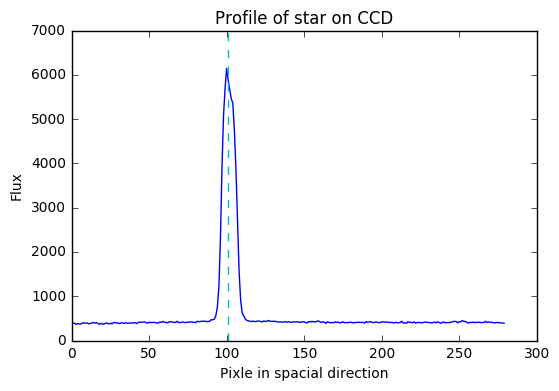

In [48]:
id_help(cent, sci1.data[:,400])
plt.title('Profile of star on CCD')
plt.xlabel('Pixle in spacial direction')
plt.ylabel('Flux')

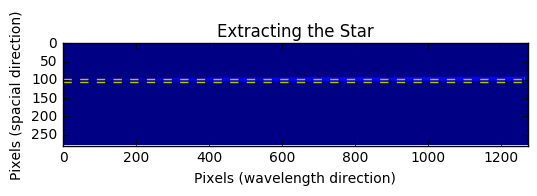

In [49]:
im = plt.imshow(sci1.data)
plt.axhline(y=cent-delt, linewidth=1, c='y', ls='dashed')
plt.axhline(y=cent+delt, linewidth=1, c='y', ls='dashed')
plt.title('Extracting the Star')
plt.xlabel('Pixels (wavelength direction)')
plt.ylabel('Pixels (spacial direction)')

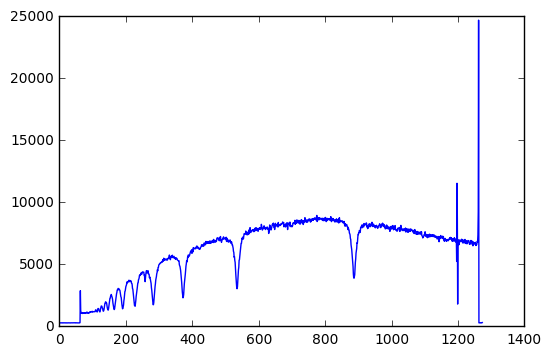

In [50]:
plt.plot(sci1.data[int(cent),:])

In [51]:
def one_d_flatten(data1):
    # on full spacial profile
    one_spacial = data1[:,400]
    cent, delt = line_center(100, one_spacial)
#     print cent, delt
    zoom_region = data1[cent-delt:cent+delt+1,:]
#     plt.imshow(zoom_region)
    return np.median(zoom_region,axis=0)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


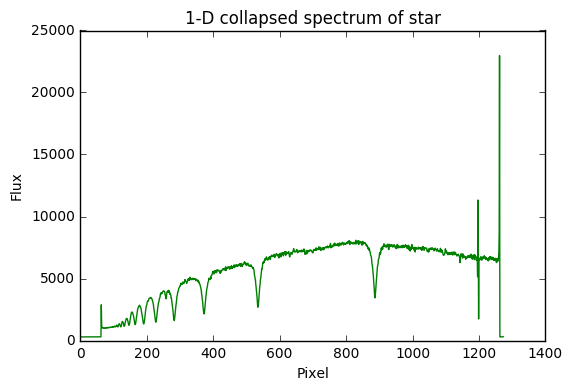

In [52]:
# extract the science spectrum
sci_1d = one_d_flatten(sci1.data)
# just one at center
# plt.plot(sci1.data[cent,:], 'b-')
# median together
plt.plot(sci_1d,'g-')
plt.title('1-D collapsed spectrum of star')
plt.xlabel('Pixel')
plt.ylabel('Flux')

In [53]:
# check your work
wvlens1 = np.array([gfit(x) for x in xrange(len(sci_1d))])
print wvlens1[0]

3556.95781925


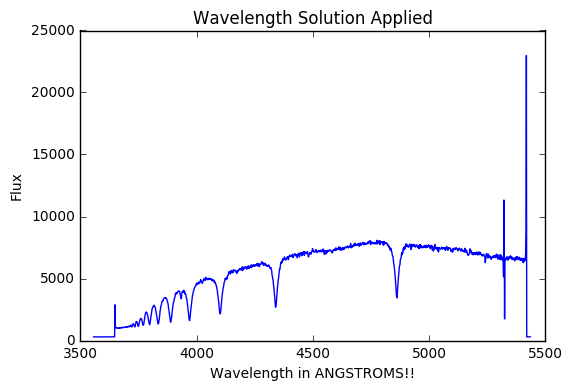

In [54]:
plt.plot(wvlens1,sci_1d)
plt.title('Wavelength Solution Applied')
plt.xlabel('Wavelength in ANGSTROMS!!')
plt.ylabel('Flux')

In [55]:
star0 = ascii.read(pwd + 'spectra_texts/' + '110913b.txt')
wvlens = star0['Wave']
fluxs = star0['Flux']

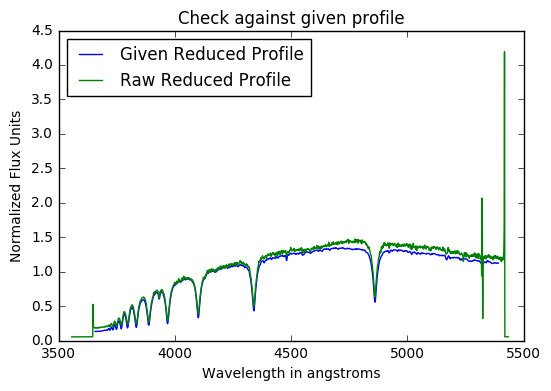

In [56]:
plot0, = plt.plot(wvlens, fluxs / np.mean(fluxs))
plot1, = plt.plot(wvlens1, sci_1d / np.mean(sci_1d))
plt.legend([plot0,plot1], ['Given Reduced Profile', 'Raw Reduced Profile'], loc=2)
plt.title('Check against given profile')
plt.xlabel('Wavelength in angstroms')
plt.ylabel('Normalized Flux Units')

In [57]:
def check(truewv, trueflux, science, fit):
    sci_wvlens = np.array([fit(x) for x in xrange(len(science))])
    plt.plot(truewv, trueflux / np.mean(trueflux))
    plt.plot(sci_wvlens, science / np.mean(science))
    plt.show()

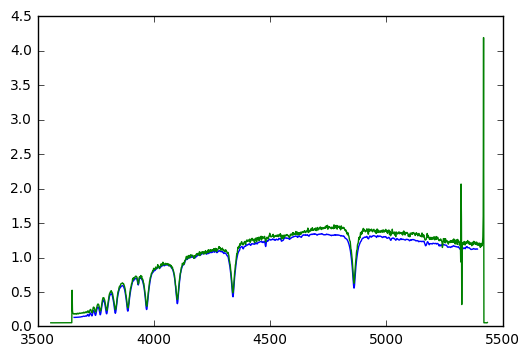

In [58]:
check(wvlens,fluxs,sci_1d,gfit)

In [59]:
# can we do better? Lets deplot the flat fields and sky subtraction.

In [60]:
flat_files = glob.glob(pwd + 'spectra_data/' + 'n1_flat*')
print flat_files

['/Users/dproctor15/Google Drive/Yale 2/yr2_fall/astr255/9-final/spectra_data/n1_flat1.fits', '/Users/dproctor15/Google Drive/Yale 2/yr2_fall/astr255/9-final/spectra_data/n1_flat2.fits', '/Users/dproctor15/Google Drive/Yale 2/yr2_fall/astr255/9-final/spectra_data/n1_flat3.fits', '/Users/dproctor15/Google Drive/Yale 2/yr2_fall/astr255/9-final/spectra_data/n1_flat4.fits', '/Users/dproctor15/Google Drive/Yale 2/yr2_fall/astr255/9-final/spectra_data/n1_flat5.fits']


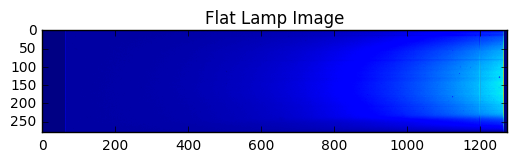

In [61]:
flat0 = read_image(flat_files[0])
plt.imshow(flat0.data)
plt.title('Flat Lamp Image')

In [62]:
# read all files, subtract median of overscan and slice overscan off. Append all files together into big array
def med_flat(flat_files):
    flats = np.array([read_image(file).data for file in flat_files])
    return np.median(flats, axis=0)

In [63]:
median_flat = med_flat(flat_files)

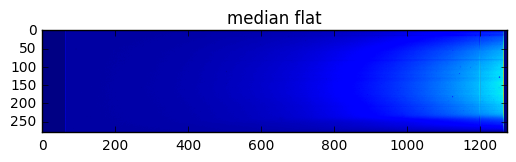

In [64]:
plt.imshow(median_flat)
plt.title('median flat')

In [65]:
median_flat.shape

(280, 1274)

In [66]:
np.normalize?

Object `np.normalize` not found.


In [67]:
# from numpy.linalg import norm
# norm(median_flat).shape

In [68]:
# 250x1200 by 1200x1200

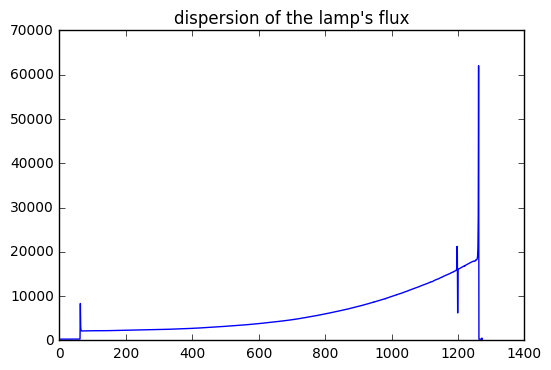

In [69]:
plt.plot(np.mean(median_flat,axis=0))#.shape
plt.title('dispersion of the lamp\'s flux')

In [70]:
ar = np.array([[1,2,3,4],[5,6,7,8]])

In [71]:
print np.transpose(ar)
ar

[[1 5]
 [2 6]
 [3 7]
 [4 8]]


array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [72]:
# norm_med_flat = median_flat / np.mean(median_flat)
norm_med_flat = np.transpose([row / np.mean(row) for row in np.transpose(median_flat)])

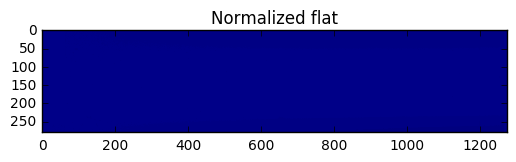

In [73]:
plt.imshow(norm_med_flat)
plt.title('Normalized flat')

In [74]:
norm_med_flat

array([[   0.9891695 ,    0.99291994,    0.99746594, ...,    0.98226664,
           0.56229081,    0.99231026],
       [   0.99943769,    0.9963438 ,    0.9906105 , ...,    0.9923931 ,
           0.55661111,    0.98606932],
       [   0.99259223,    0.99976767,    0.9906105 , ...,    1.00251956,
           0.56229081,    0.9767079 ],
       ..., 
       [   0.98574677,    0.99976767,    0.98032735, ...,    0.98564213,
           0.55471787,    1.00479215],
       [   0.98232403,    0.96552905,    0.98032735, ...,    0.98901761,
           0.55661111,    1.00791263],
       [   0.98232403,    0.99291994,    0.99403822, ...,    1.32994177,
         124.07316001,    0.        ]])

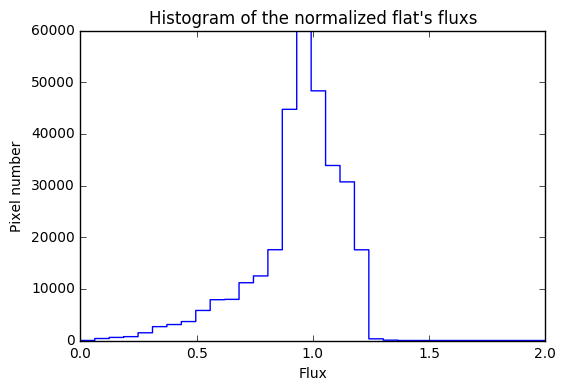

In [75]:
# plt.hist(flux_base, bins=20)
hist, bins = np.histogram(norm_med_flat, bins=2000)
plt.plot(bins[:-1],hist, ls='steps')
plt.axis([0,2,0,60000])
plt.title('Histogram of the normalized flat\'s fluxs')
plt.xlabel('Flux')
plt.ylabel('Pixel number')

In [76]:
np.min(norm_med_flat)

0.0

In [77]:
norm_med_flat_nonzero = np.array([[.05 if val == 0.0 else val for val in row] for row in norm_med_flat])

In [78]:
np.min(norm_med_flat_nonzero)

0.050000000000000003

In [79]:
flat_rdx_sci = sci1.data / norm_med_flat_nonzero

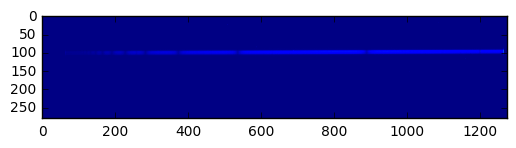

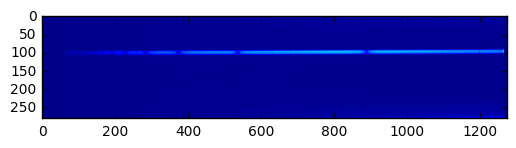

In [80]:
plt.imshow(sci1.data)
plt.show()
# need to subtract the overscan.
plt.imshow(flat_rdx_sci)

In [81]:
sci_1d_wflat = one_d_flatten(flat_rdx_sci)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [82]:
sci_1d_wflat.shape

(1274,)

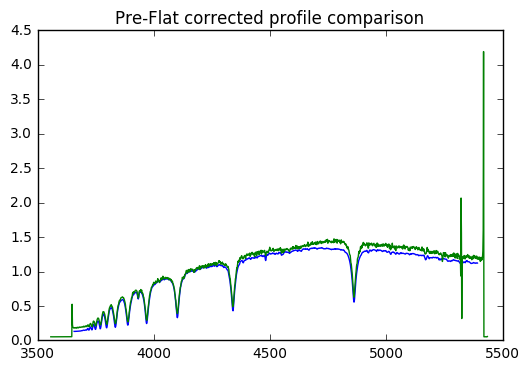

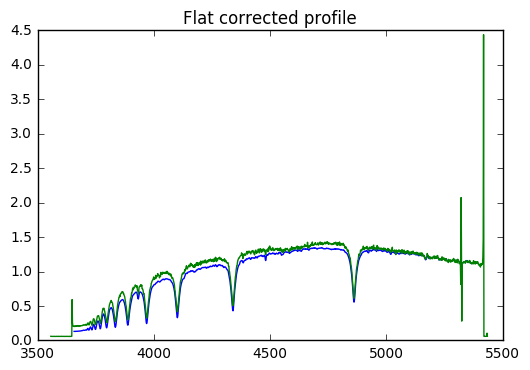

In [83]:
plt.title('Pre-Flat corrected profile comparison')
check(wvlens,fluxs,sci_1d,gfit)
plt.title('Flat corrected profile')
check(wvlens,fluxs,sci_1d_wflat,gfit)

In [ ]:
SCRAP

In [ ]:
plt.plot(comp.data[:,400])

In [ ]:
for i in xrange(len(prec_lines10)):
    print gfit(prec_lines10[i]) - prec_wvlens[i]
    print gfit(prec_lines10[i]), prec_wvlens[i]

In [ ]:
#     cent = int(line_center(100, one_spacial))
    print cent, delt
    return
    delt = 5 # pixels

In [ ]:
sci1.data.shape

In [ ]:
len(sci1.data)

In [ ]:
print sci1.data

In [ ]:
# deriving the wavelength function
line = [991, 624, 227, 822]
pixel = [5015.67, 4471.48, 3888.65, 4764.86]
plt.plot(pixel,line, 'r.')

In [ ]:
coefs2 = np.polyfit(pixel,line,3)
print coefs2

In [ ]:
gfit = np.poly1d(coefs2)
print gfit
print gfit(3900)

In [ ]:
plt.plot(pixel,line,'r.')
plt.plot(pixel,gfit(pixel))

In [ ]:
# np.poly1d?

In [ ]:
p = np.poly1d([1, 2, 3])

In [ ]:
print p
print p(1)

In [ ]:
p2 = np.poly1d([1,2])
print p2

In [ ]:
p2.r

In [ ]:
p3 = np.poly1d([1,2,3],[2,3,4],1)
print p3

In [ ]:
x = [ 3.08,  3.1 ,  3.12,  3.14,  3.16,  3.18,  3.2 ,  3.22,  3.24,
    3.26,  3.28,  3.3 ,  3.32,  3.34,  3.36,  3.38,  3.4 ,  3.42,
    3.44,  3.46,  3.48,  3.5 ,  3.52,  3.54,  3.56,  3.58,  3.6 ,
    3.62,  3.64,  3.66,  3.68]

y = [ 0.000857,  0.001182,  0.001619,  0.002113,  0.002702,  0.003351,
    0.004062,  0.004754,  0.00546 ,  0.006183,  0.006816,  0.007362,
    0.007844,  0.008207,  0.008474,  0.008541,  0.008539,  0.008445,
    0.008251,  0.007974,  0.007608,  0.007193,  0.006752,  0.006269,
    0.005799,  0.005302,  0.004822,  0.004339,  0.00391 ,  0.003481,
    0.003095]
print x

In [ ]:
print len(x),len(y)

In [ ]:
plt.plot(x,y,'r.')

In [ ]:
coefs = np.polynomial.polynomial.polyfit(x, y, 4)
print coefs

In [ ]:
ffit = np.poly1d(coefs)
print ffit

In [ ]:
ffit(3.1)

In [ ]:
plt.plot(x,y,'r.')
plt.plot(x,ffit(x))

In [ ]:
coefs2 = np.polyfit(x,y,4)
print coefs2

In [ ]:
print coefs

In [ ]:
gfit = np.poly1d(coefs2)

In [ ]:
print gfit(3.1)

In [ ]:
plt.plot(x,y,'r.')
plt.plot(x,gfit(x))

In [ ]:
from scipy.stats import norm


# Generate some data for this demonstration.
data = norm.rvs(10.0, 2.5, size=500)

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, normed=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [ ]:
import numpy
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define some test data which is close to Gaussian
data = numpy.random.normal(size=10000)

hist, bin_edges = numpy.histogram(data, density=True)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

# Define model function to be used to fit to the data above:
def gauss(x, *p):
    A, mu, sigma = p
    return A*numpy.exp(-(x-mu)**2/(2.*sigma**2))

# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
p0 = [1., 0., 1.]

coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)

# Get the fitted curve
hist_fit = gauss(bin_centres, *coeff)

plt.plot(bin_centres, hist, label='Test data')
plt.plot(bin_centres, hist_fit, label='Fitted data')

# Finally, lets get the fitting parameters, i.e. the mean and standard deviation:
print 'Fitted mean = ', coeff[1]
print 'Fitted standard deviation = ', coeff[2]

plt.show()

In [ ]:
np.array([1,2,3]).tolist()

In [ ]:
[1,2,3].index(2)

In [ ]:
[3,2,1][::-1]

In [ ]:
bin_centres = [x+.5 for x in xrange(10)]
print bin_centres

In [ ]:
bin_centers = np.arange(.5,10.5,1)
print bin_centers

In [ ]:
print bin_centers.shape
print em_wind.shape

In [ ]:
np.arange(10)

In [ ]:
arr = [1,2,3]
arr2 = list(arr)
arr2.pop()
arr

In [ ]:
a = np.arange(3)
print a.tolist()
a

In [ ]:
import heapq
# heap = []
def k_big_lines(n,comp1d):
    arr = comp1d.tolist()
    arr2 = (-1 * comp1d).tolist()
    print arr
    print arr2
    return
    heapq.heapify(arr2)
#     print arr2[:n]
    print [arr.index(-1 * heapq.heappop(arr2)) for i in xrange(n)]
#     for pixval in comp1d:
#         heapq.push(heap, pixval)
#     print 

In [ ]:
# k_big_lines(10, comp1d)